# Met stations

In [1]:
import os
from datetime import datetime, timezone
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import climag.plot_configs as cplt
from climag.download_data import download_data

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-19 11:12:57.102568+00:00


## Met Éireann stations

- Station details can be found here:
  <https://cli.fusio.net/cli/climate_data/webdata/StationDetails.csv>
- <https://www.met.ie/climate/weather-observing-stations>
- Check the "Show closed stations" box to obtain data for this replaced
  station: <https://www.met.ie/climate/available-data/historical-data>

In [3]:
URL = "https://cli.fusio.net/cli/climate_data/webdata/StationDetails.csv"
SUB_DIR = os.path.join("data", "met", "meteireann", "raw")

In [23]:
# download data if necessary
download_data(server=URL, dl_dir=SUB_DIR)

Data successfully downloaded to data/met/meteireann/raw 
Last downloaded: 2022-10-12 15:19:58.437123+00:00


In [4]:
os.listdir(SUB_DIR)

['corkairport', 'moorepark', 'StationDetails.csv']

In [5]:
stations_roi = pd.read_csv(os.path.join(SUB_DIR, "StationDetails.csv"))

In [6]:
stations_roi.shape

(2083, 10)

In [7]:
stations_roi.head()

,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year
0,Antrim,5880,LH_RATHLIN_WEST,10,309200,451800,55.30083,-6.28028,2000,(null)
1,Carlow,4415,TULLOW (Waterworks),76,284700,173400,52.80528,-6.74306,1985,(null)
2,Carlow,2414,BORRIS G.S.,85,272400,150700,52.60278,-6.93056,1944,1991
3,Carlow,1214,CARLOW (SUGAR FACTORY),58,272200,178400,52.85139,-6.92778,1953,1960
4,Carlow,115,HACKETSTOWN RECTORY,182,297600,180500,52.86667,-6.55000,1910,1944


In [8]:
# convert coordinates to well known text
stations_roi["wkt"] = (
    "POINT (" + stations_roi["longitude"].astype(str) + " " +
    stations_roi["latitude"].astype(str) + ")"
)

In [9]:
# convert wkt to geometry
stations_roi = gpd.GeoDataFrame(
    stations_roi,
    geometry=gpd.GeoSeries.from_wkt(stations_roi["wkt"]),
    crs="EPSG:4326"
)

In [10]:
# drop wkt, lon, lat column
stations_roi.drop(columns=["wkt", "longitude", "latitude"], inplace=True)

In [11]:
stations_roi["close year"].unique()

array(['(null)', '1991', '1960', '1944', '1968', '1998', '1984', '1965',
       '2000', '1959', '1986', '1989', '2001', '1996', '1895', '1993',
       '1988', '1980', '2005', '1971', '1999', '1966', '1975', '1950',
       '1972', '2018', '1987', '1990', '1973', '1969', '2019', '2009',
       '1977', '2011', '1994', '1961', '2007', '1983', '2013', '1933',
       '1963', '1952', '1982', '1943', '1985', '1956', '1970', '1964',
       '1962', '1974', '1979', '2010', '2020', '1953', '2006', '1936',
       '2017', '1919', '2002', '1945', '1924', '2012', '1995', '1940',
       '1955', '1997', '1967', '1949', '2014', '1951', '2008', '1948',
       '1957', '1981', '2016', '1992', '1958', '1935', '1931', '1937',
       '2004', '2003', '1946', '2015', '1911', '1925', '1907', '1954',
       '1921', '1976', '1917', '1938', '1939', '1978', '1904', '1886',
       '1923', '1913', '1918', '1930', '1942', '1920', '1928', '1947',
       '1912', '1899', '1889', '2021', '1929', '1916'], dtype=object)

In [12]:
stations_roi["open year"].unique()

array(['2000', '1985', '1944', '1953', '1910', '1960', '1951', '1973',
       '1963', '1950', '1987', '1866', '2003', '1946', '1982', '1967',
       '1890', '1990', '1949', '1995', '1943', '1942', '1923', '1956',
       '1958', '1968', '1984', '1972', '1992', '1993', '2001', '1952',
       '2019', '1997', '2007', '2012', '2010', '1896', '2020', '1928',
       '2014', '2005', '1897', '1940', '1924', '1961', '1974', '1983',
       '1957', '1986', '1937', '1999', '1945', '1966', '2013', '1900',
       '2015', '1948', '1978', '1936', '1914', '1925', '1962', '1981',
       '1964', '1969', '1959', '2004', '1976', '1954', '1941', '1975',
       '1935', '1988', '1994', '1862', '1998', '1977', '1873', '2018',
       '1905', '1996', '2021', '1904', '1892', '1991', '2009', '2017',
       '2016', '1909', '1895', '1911', '2002', '2008', '1921', '1938',
       '1965', '1885', '1970', '1880', '1929', '1934', '1915', '1908',
       '1913', '1894', '1920', '1926', '1931', '1829', '1860', '1939',
      

In [13]:
# replace null values so that the data can be filtered
stations_roi = stations_roi.replace({
    "close year": {"(null)": 9999},
    "open year": {"(null)": 0}
})

In [14]:
stations_roi["close year"] = pd.to_numeric(stations_roi["close year"])
stations_roi["open year"] = pd.to_numeric(stations_roi["open year"])

In [15]:
# filter stations that have data for the historic reference period
stations_roi = stations_roi[
    (stations_roi["close year"] >= 2005) & (stations_roi["open year"] <= 1976)
]

In [16]:
stations_roi

,county,station name,name,height(m),easting,northing,open year,close year,geometry
25,Carlow,2115,HACKETSTOWN (Voc.Sch.),189,297500,179900,1949,9999,POINT (-6.55278 52.86111)
39,Cavan,737,BALLYHAISE (AGR.COLL.),67,245200,311600,1923,2005,POINT (-7.30972 54.05139)
40,Cavan,3037,SWANLINBAR,69,219400,327500,1942,2018,POINT (-7.70278 54.19583)
51,Cavan,4037,LOUGH GOWNA (GLENBROOK),91,231200,292100,1973,2009,POINT (-7.52500 53.87778)
52,Cavan,4031,BAILIEBORO (Duneena),158,264460,299820,1973,9999,POINT (-7.01917 53.94389)
...,...,...,...,...,...,...,...,...,...
2071,Wicklow,9220,M.DUFF HILL,701,308700,207200,1948,9999,POINT (-6.37639 53.10417)
2074,Wicklow,9420,M.GLENMALURE (Cloghernagh For.),436,309100,190500,1952,9999,POINT (-6.37639 52.95417)
2075,Wicklow,9520,M.RATHDRUM (Ballintombay For.),384,314400,190200,1952,9999,POINT (-6.29667 52.95083)
2078,Wicklow,9820,M.LOUGH OULER,457,309693,202757,1965,9999,POINT (-6.36444 53.06444)


In [17]:
# replace null values
stations_roi = stations_roi.replace({"close year": {9999: None}})
stations_roi = stations_roi.replace({"open year": {0: None}})

In [18]:
stations_roi.head()

,county,station name,name,height(m),easting,northing,open year,close year,geometry
25,Carlow,2115,HACKETSTOWN (Voc.Sch.),189,297500,179900,1949,None,POINT (-6.55278 52.86111)
39,Cavan,737,BALLYHAISE (AGR.COLL.),67,245200,311600,1923,2005,POINT (-7.30972 54.05139)
40,Cavan,3037,SWANLINBAR,69,219400,327500,1942,2018,POINT (-7.70278 54.19583)
51,Cavan,4037,LOUGH GOWNA (GLENBROOK),91,231200,292100,1973,2009,POINT (-7.52500 53.87778)
52,Cavan,4031,BAILIEBORO (Duneena),158,264460,299820,1973,None,POINT (-7.01917 53.94389)


In [19]:
stations_roi.shape

(223, 9)

## Met Office data for stations in Northern Ireland

<https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-synoptic-and-climate-stations>

Met Office (2019): Met Office MIDAS Open: UK Land Surface Stations Data
(1853-current). Centre for Environmental Data Analysis.
<https://catalogue.ceda.ac.uk/uuid/dbd451271eb04662beade68da43546e1>

In [20]:
SUB_DIR = os.path.join("data", "met", "metoffice", "raw")

In [21]:
stations_ni = pd.read_csv(
    os.path.join(
        SUB_DIR,
        "midas-open_uk-daily-rain-obs_dv-202107_station-metadata.csv"
    ),
    skiprows=46,
    skipfooter=1,
    engine="python"
)

In [22]:
stations_ni.shape

(1523, 9)

In [23]:
stations_ni.head()

,src_id,station_name,station_file_name,historic_county,station_latitude,station_longitude,station_elevation,first_year,last_year
0,1,FOULA,foula,shetland,60.154,-2.074,22,1989,2003
1,3,FAIR ISLE,fair-isle,shetland,59.526,-1.630,57,1974,1997
2,5,HAMNAVOE,hamnavoe,shetland,60.104,-1.333,21,1961,1973
3,6,SCATSTA,scatsta,shetland,60.439,-1.308,15,1974,1980
4,7,COLLAFIRTH,collafirth,shetland,60.533,-1.391,228,1983,1991


In [24]:
# list of historic counties in NI
# https://en.wikipedia.org/wiki/Historic_counties_of_the_United_Kingdom
counties_ni = [
    "antrim", "armagh", "down", "fermanagh", "londonderry", "tyrone"
]

In [25]:
# keep only NI data
stations_ni = stations_ni[stations_ni["historic_county"].isin(counties_ni)]

In [26]:
# convert coordinates to well known text
stations_ni["wkt"] = (
    "POINT (" + stations_ni["station_longitude"].astype(str) + " " +
    stations_ni["station_latitude"].astype(str) + ")"
)

In [27]:
# convert wkt to geometry
stations_ni = gpd.GeoDataFrame(
    stations_ni,
    geometry=gpd.GeoSeries.from_wkt(stations_ni["wkt"]),
    crs="EPSG:4326"
)

In [28]:
# drop wkt, lon, lat column
stations_ni.drop(
    columns=["wkt", "station_longitude", "station_latitude"],
    inplace=True
)

In [29]:
stations_ni["first_year"].unique()

array([1999, 2000, 1996, 1976, 1978, 1963, 1962, 1986, 1969, 1972, 1964,
       1995, 1961, 1981, 1970, 1980, 1993, 1965, 1966, 1971, 1987, 1975,
       1979, 1992, 1989, 1982, 1924, 1967, 1997, 1985, 1968, 1990, 1983,
       1991, 1954, 1984, 1853, 1892, 1872, 1973, 1974, 1998, 2002])

In [30]:
stations_ni["last_year"].unique()

array([2001, 2019, 2004, 1998, 1984, 1997, 2005, 1985, 1987, 2009, 1995,
       1993, 1982, 1977, 2000, 1986, 1980, 1971, 2013, 1996, 1973, 2008,
       2003, 1974, 2014, 1972, 1983, 2007, 1990, 1979, 1981, 2020, 1992,
       2006, 1976, 1975, 1989, 1991, 1999, 2010, 1968, 1988, 2002, 1994,
       2012, 1965, 2015, 2017, 2011])

In [31]:
# filter stations that have data for the historic reference period
stations_ni = stations_ni[
    (stations_ni["last_year"] >= 2005) & (stations_ni["first_year"] <= 1976)
]

In [32]:
# rename Londonderry to Derry
stations_ni = stations_ni.replace(
    {"historic_county": {"londonderry": "derry"}}
)

In [33]:
stations_ni.head()

,src_id,station_name,station_file_name,historic_county,station_elevation,first_year,last_year,geometry
1205,1427,CARMONEY,carmoney,derry,73,1963,2005,POINT (-7.21100 55.02500)
1209,1431,"BANAGHER, CAUGH HILL",banagher-caugh-hill,derry,214,1969,2009,POINT (-6.96600 54.88600)
1224,1449,LISNAFILLAN,lisnafillan,antrim,38,1963,2005,POINT (-6.32600 54.85700)
1227,1452,ALTNAHINCH FILTERS,altnahinch-filters,antrim,213,1966,2009,POINT (-6.25500 55.04800)
1230,1457,CARNLOUGH,carnlough,antrim,12,1975,2005,POINT (-5.99300 54.98400)


In [34]:
stations_ni.shape

(21, 8)

## Plot

In [35]:
# Ireland boundary
GPKG_BOUNDARY = os.path.join("data", "boundary", "boundaries.gpkg")
ie = gpd.read_file(GPKG_BOUNDARY, layer="NUTS_Ireland")

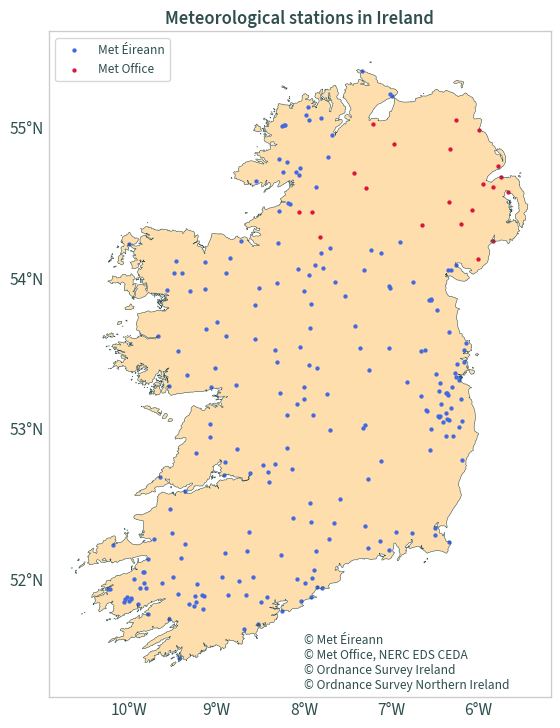

In [37]:
base = ie.plot(color="navajowhite", figsize=(9, 9))
ie.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)
stations_roi.plot(
    ax=base, color="royalblue", markersize=5, label="Met Éireann"
)
stations_ni.plot(ax=base, color="crimson", markersize=5, label="Met Office")

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Meteorological stations in Ireland")
plt.text(
    -8, 51.275,
    "© Met Éireann\n© Met Office, NERC EDS CEDA\n" +
    "© Ordnance Survey Ireland\n"
    "© Ordnance Survey Northern Ireland"
)
plt.legend(loc="upper left")

plt.show()

In [38]:
# save as GPKG
GPKG_MET = os.path.join("data", "met", "stations.gpkg")
stations_roi.to_file(GPKG_MET, layer="meteireann")
stations_ni.to_file(GPKG_MET, layer="metoffice")